In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import astropy.io.ascii as at

In [2]:
import matplotlib as mpl
print(mpl.__version__)

smallfont = 12
largefont = 14

mpl.rcParams['axes.labelsize'] = largefont
mpl.rcParams['legend.fontsize'] = smallfont
mpl.rcParams['xtick.labelsize'] = smallfont
mpl.rcParams['ytick.labelsize'] = smallfont


3.2.2


https://matplotlib.org/stable/gallery/ticks_and_spines/tick-locators.html#sphx-glr-gallery-ticks-and-spines-tick-locators-py

https://matplotlib.org/3.2.2/gallery/ticks_and_spines/tick-locators.html#sphx-glr-gallery-ticks-and-spines-tick-locators-py

In [3]:
import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Teaching/Resources/MyDemos')

Mounted at /content/drive


# 1D Axes with different scales

In [4]:
def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=2.00, length=10,labelsize=14)
    ax.tick_params(which='minor', width=1.5, length=5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    # ax.text(0.0, 0.2, title, transform=ax.transAxes,
    #         fontsize=14, fontname='Monospace', color='tab:blue')


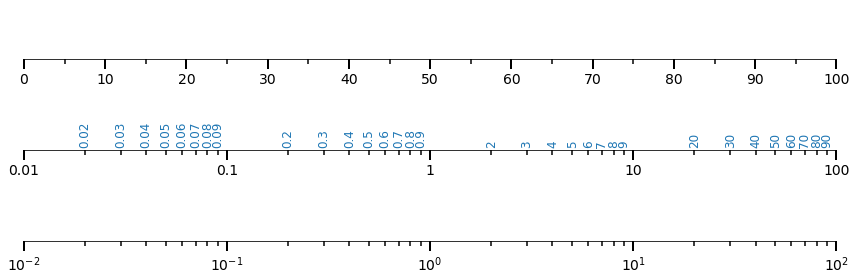

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(12, 4))

# Linear Locator
setup(axs[0], title="LinearLocator(numticks=3)")
axs[0].set_xlim(0, 100)
axs[0].xaxis.set_major_locator(ticker.LinearLocator(11))
axs[0].xaxis.set_minor_locator(ticker.LinearLocator(21))

# Log Locator

setup(axs[1], title="LogLocator(base=10, numticks=15)")
axs[1].set_xlim(10**-2, 10**2)
axs[1].set_xscale('log')
axs[1].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
axs[1].set_xticklabels(["","0.01","0.1","1","10","100"])

for i in range(2,10):
    axs[1].text(i,0.1,f"{i}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)
for i in np.arange(0.2,1,0.1):
    axs[1].text(i,0.1,f"{i:.1f}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)
for i in np.arange(0.02,0.1,0.01):
    axs[1].text(i,0.1,f"{i:.2f}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)
for i in range(20,100,10):
    axs[1].text(i,0.1,f"{i:.0f}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)


# Log Locator
setup(axs[2], title="LogLocator(base=10, numticks=15)")
axs[2].set_xlim(10**-2, 10**2)
axs[2].set_xscale('log')
axs[2].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
# for i in range(2,10):
#     axs[2].text(i,0.1,f"{i:.0e}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)
# for i in np.arange(0.2,1,0.1):
#     axs[2].text(i,0.1,f"{i:.0e}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)
# for i in np.arange(0.02,0.1,0.01):
#     axs[2].text(i,0.1,f"{i:.0e}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)
# for i in range(20,100,10):
#     axs[2].text(i,0.1,f"{i:.0e}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)

plt.tight_layout()
# plt.show()

plt.savefig("linear_log_scales.png",dpi=600,bbox_inches="tight")

In [45]:
planets = at.read("planet_axes.csv")
nplanets = len(planets)
print(nplanets,planets.dtype)

10 [('Planet', '<U7'), ('a (AU)', '<f8')]


In [41]:
def plot_planets(ax,max_num=10):
  xvals = planets["a (AU)"][:max_num]
  yvals = np.ones_like(xvals)*0.15
  ax.scatter(xvals,yvals,c=np.log10(xvals),cmap="viridis",edgecolor="k",s=100)

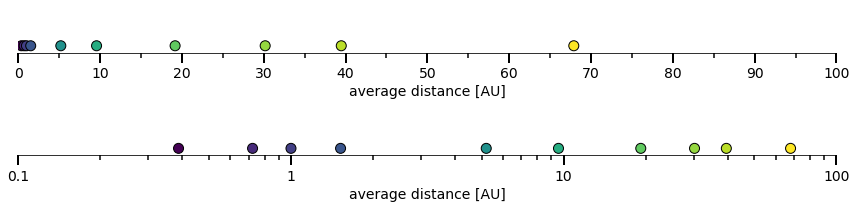

In [44]:
fig, axs = plt.subplots(2, 1, figsize=(12, 3))

# Linear Locator
setup(axs[0], title="LinearLocator(numticks=3)")
axs[0].set_xlim(0, 100)
axs[0].xaxis.set_major_locator(ticker.LinearLocator(11))
axs[0].xaxis.set_minor_locator(ticker.LinearLocator(21))
plot_planets(axs[0])
axs[0].set_xlabel("average distance [AU]")

# Log Locator

setup(axs[1], title="LogLocator(base=10, numticks=15)")
axs[1].set_xlim(10**-1, 10**2)
axs[1].set_xscale('log')
axs[1].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
axs[1].set_xticklabels(["","0.1","1","10","100"])
plot_planets(axs[1])
axs[1].set_xlabel("average distance [AU]")

# for i in range(2,10):
#     axs[1].text(i,0.1,f"{i}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)
# for i in np.arange(0.2,1,0.1):
#     axs[1].text(i,0.1,f"{i:.1f}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)
# for i in np.arange(0.02,0.1,0.01):
#     axs[1].text(i,0.1,f"{i:.2f}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)
# for i in range(20,100,10):
#     axs[1].text(i,0.1,f"{i:.0f}",color="C0",horizontalalignment="center",fontsize=12,rotation=90)



plt.tight_layout()
# plt.show()

plt.savefig("linear_log_scales_planets.png",dpi=600,bbox_inches="tight")

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Teaching/Resources/MyDemos'

# Demo 2D plots with different scales

In [ ]:
x1 = np.linspace(1e-2,10,100)
y1 = x1

x2 = x1
y2 = x2**2

In [ ]:
def plotit(ax):
  ax.plot(x1,y1,label="Linear, y = x",lw=1.5)
  ax.plot(x2,y2,'--',label=r"Quadratic, y = x$^2$",lw=1.5)
  ax.set_xlabel("X")
  ax.set_ylabel("Y")


In [ ]:
def plot_four(axes):
  for i in range(2):
    for j in range(2):
      plotit(axes[i,j])

      if i==1:
        axes[i,j].set_xscale("log")
        axes[i,j].set_xlim(1e-1,10)
      else:
        axes[i,j].set_xlim(0,10)

      if j==1:
        axes[i,j].set_yscale("log")
        axes[i,j].set_ylim(1e-1,1e2)
        axes[i,j].yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=50))
      else:
        axes[i,j].set_ylim(0,1e2)

      axes[i,j].grid(True)
      axes[i,j].grid(True,which="minor",axis="both")


In [ ]:
def plot_four_2(axes):
  for i in range(2):
    for j in range(2):
      plotit(axes[i,j])
      plt.xlabel("X")
      plt.ylabel("Y")

      if j==1:
        axes[i,j].set_xscale("log")
        axes[i,j].set_xlim(1e-1,10)
      else:
        axes[i,j].set_xlim(0,10)

      if i==1:
        axes[i,j].set_yscale("log")
        axes[i,j].set_ylim(1e-1,1e2)
        axes[i,j].yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=50))
      else:
        axes[i,j].set_ylim(0,1e2)

      axes[i,j].grid(True)
      axes[i,j].grid(True,which="minor",axis="both")


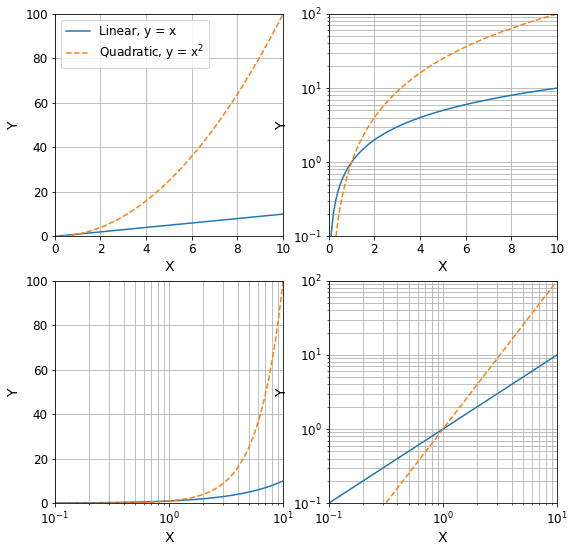

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(9,9))
plot_four(axes)
axes[0,0].legend(loc=2)
plt.savefig("linear_log_square.png",dpi=600,bbox_inches="tight")
plt.savefig("linear_log_square.pdf",dpi=600,bbox_inches="tight")

In [ ]:
fig1, axes1 = plt.subplots(2,1,figsize=(9,9))
fig2, axes2 = plt.subplots(2,1,figsize=(9,9))

axes = np.array([[axes1[0],axes2[0]],[axes1[1],axes2[1]]])
print(axes)

plot_four_2(axes)
axes1[0].legend(loc=2)
axes2[0].legend(loc=2)

fig1.savefig("linearx_varyy.png",dpi=600,bbox_inches="tight")
fig2.savefig("logx_varyy.png",dpi=600,bbox_inches="tight")

In [ ]:
fig1, axes1 = plt.subplots(2,1,figsize=(9,9))
fig2, axes2 = plt.subplots(2,1,figsize=(9,9))

axes = np.array([[axes1[0],axes2[0]],[axes1[1],axes2[1]]])
print(axes)

plot_four(axes)
axes1[0].legend(loc=2)
axes2[0].legend(loc=2)

fig1.savefig("lineary_varyx.png",dpi=600,bbox_inches="tight")
fig2.savefig("logy_varyx.png",dpi=600,bbox_inches="tight")